# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the "Boston Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Perform a linear regression using statsmodels
* Determine if a particular set of data exhibits the assumptions of linear regression
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Use the coefficient of determination to determine model performance
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data


## Let's get started

### Import necessary libraries and load 'BostonHousing.csv' as a pandas dataframe

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

df = pd.read_csv('BostonHousing.csv')

The columns in the Boston housing data represent the dependent and independent variables. The dependent variable here is the median house value `MEDV`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [2]:
# Your code here
print(df.head())
print(df.describe())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    

In [3]:
# Record your observations here 
#quite a few different statistics here that are all numerical:
#crim
#per capita crime rate by town.
#zn
#proportion of residential land zoned for lots over 25,000 sq.ft.
#indus
#proportion of non-retail business acres per town.
#chas
#Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
#nox
#nitrogen oxides concentration (parts per 10 million).
#rm
#average number of rooms per dwelling.
#age
#proportion of owner-occupied units built prior to 1940.
#dis
#weighted mean of distances to five Boston employment centres.
#rad
#index of accessibility to radial highways.
#tax
#full-value property-tax rate per $10,000.
#ptratio
#pupil-teacher ratio by town.
#black
#1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
#lstat
#lower status of the population (percent).
#medv
#median value of owner-occupied homes in $1000s.

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

In [3]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

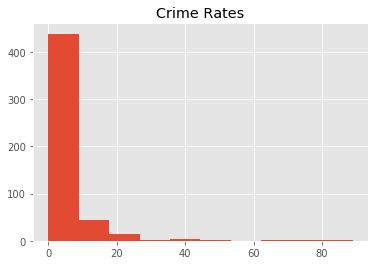

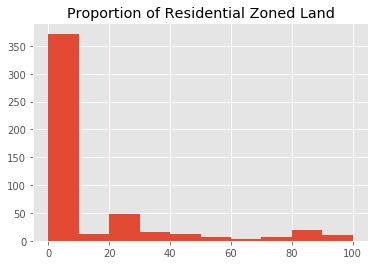

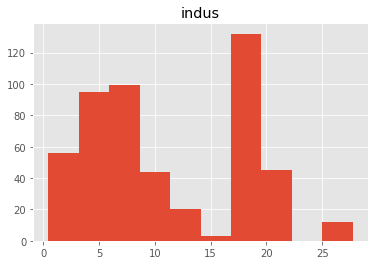

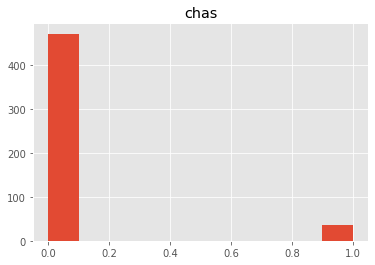

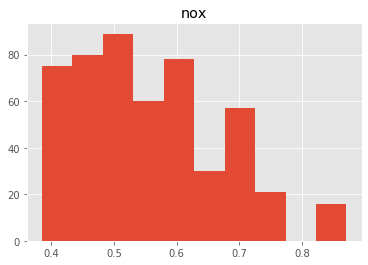

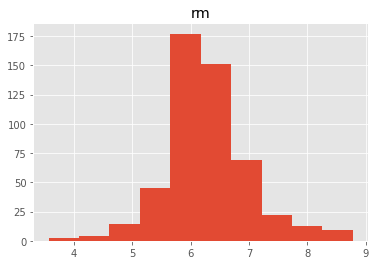

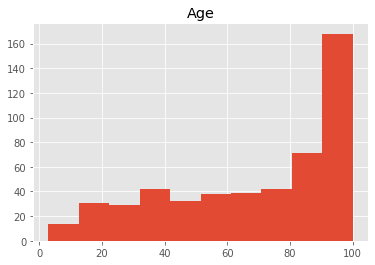

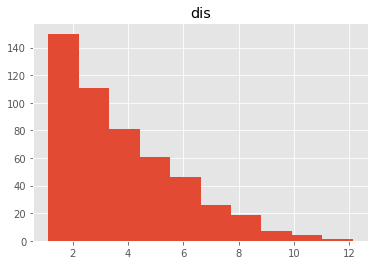

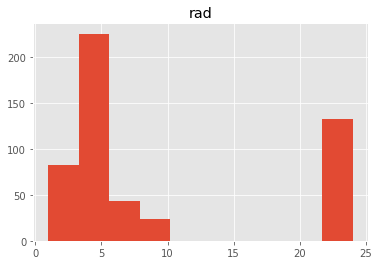

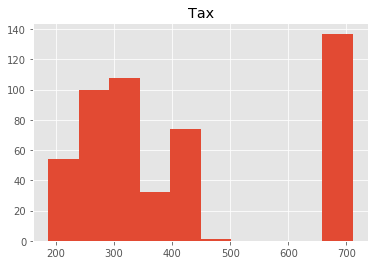

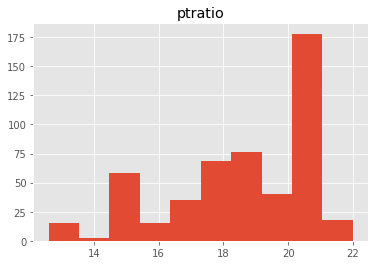

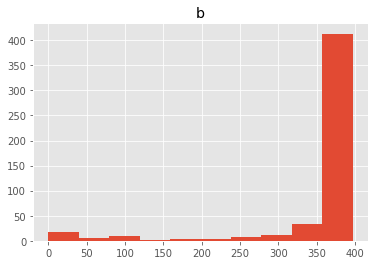

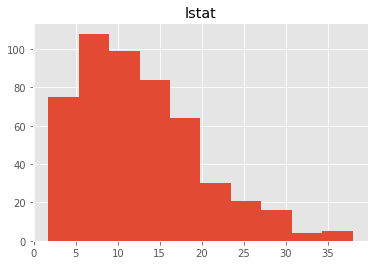

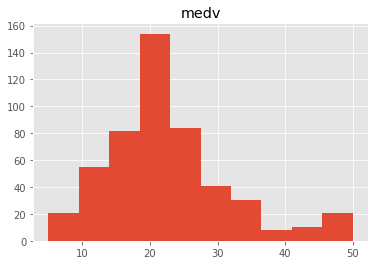

In [4]:
# Your code here 
plt.hist(df['crim'])
plt.title('Crime Rates')
plt.show()

plt.hist(df['zn'])
plt.title('Proportion of Residential Zoned Land')
plt.show()

plt.hist(df['indus'])
plt.title('indus')
plt.show()

plt.hist(df['chas'])
plt.title('chas')
plt.show()

plt.hist(df['nox'])
plt.title('nox')
plt.show()

plt.hist(df['rm'])
plt.title('rm')
plt.show()

plt.hist(df['age'])
plt.title('Age')
plt.show()

plt.hist(df['dis'])
plt.title('dis')
plt.show()

plt.hist(df['rad'])
plt.title('rad')
plt.show()


plt.hist(df['tax'])
plt.title('Tax')
plt.show()

plt.hist(df['ptratio'])
plt.title('ptratio')
plt.show()

plt.hist(df['b'])
plt.title('b')
plt.show()

plt.hist(df['lstat'])
plt.title('lstat')
plt.show()

plt.hist(df['medv'])
plt.title('medv')
plt.show()

In [6]:
# You observations here 
#crim is right skewed
#zn is heavily right skewed
#indus is bimodal
#chas has an outlier it appears
#nox is right skewed but closer to symmetric than others
#rm is fairly normally distributed or symmetric
#age is left skewed
#dis is right skewed
#rad is bimodal with a gap
#tax is bimodal with a gap
#ptratio is somewhat symmetric but more left skewed
#b is left skewed
#lstat is right skewed but close to symmetric
#medv is fairly symmetric with a small skew right

Based on this, we preselected some features  for you which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [6]:
# Your code here
df2 = df.filter(['crim', 'dis', 'rm', 'zn', 'age', 'medv'], axis=1)
df2.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check the linearity assumption for all chosen features with target variable using scatter plots

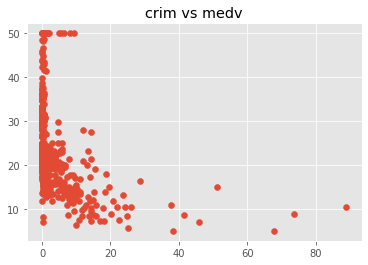

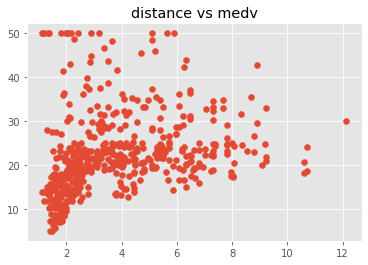

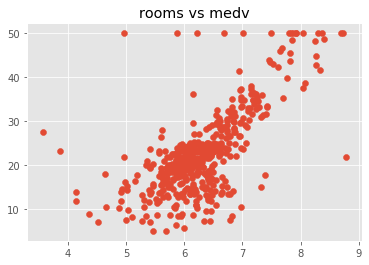

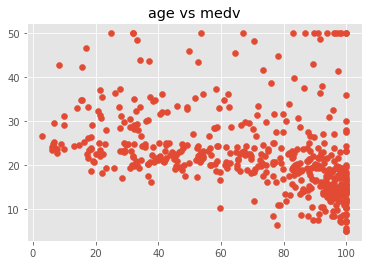

In [7]:
# Your code here 

plt.scatter(df2['crim'], df2['medv'])
plt.title('crim vs medv')
plt.show()

plt.scatter(df2['dis'], df2['medv'])
plt.title('distance vs medv')
plt.show()
plt.scatter(df2['rm'], df2['medv'])
plt.title('rooms vs medv')
plt.show()
plt.scatter(df2['age'], df2['medv'])
plt.title('age vs medv')

plt.show()



In [ ]:
# Your observations here 
# none of these seem to have a linear relationship. 
# age and medv might
# rooms and medv might as well but it's difficult to tell


Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll use the dataset untouched and just move on with the regression. The assumptions are not _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~crim
--------------------------------------------------------------------------------------


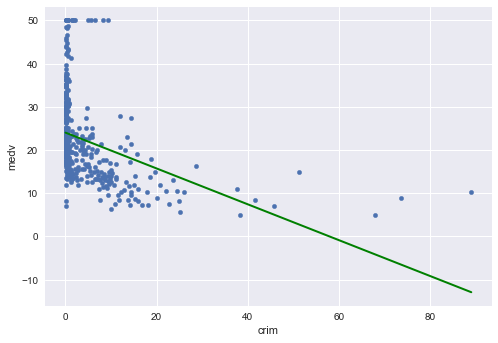

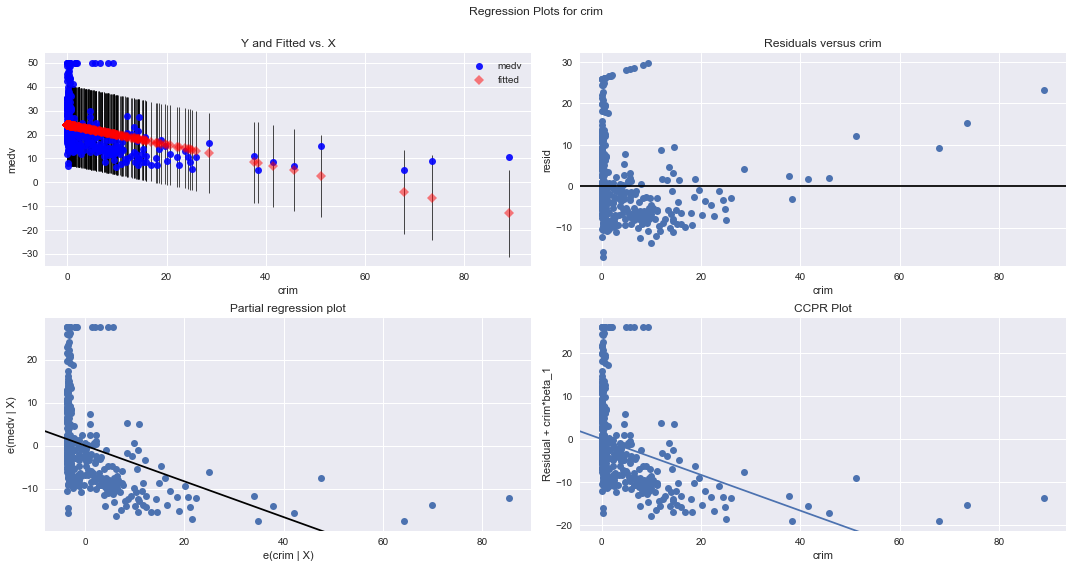

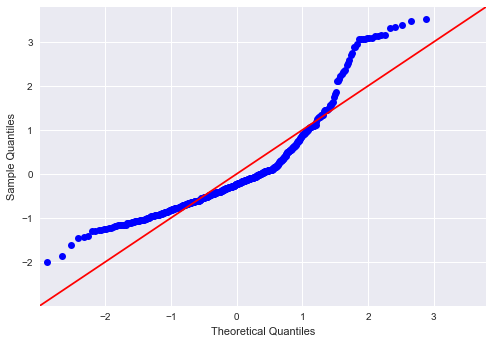

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~dis
--------------------------------------------------------------------------------------


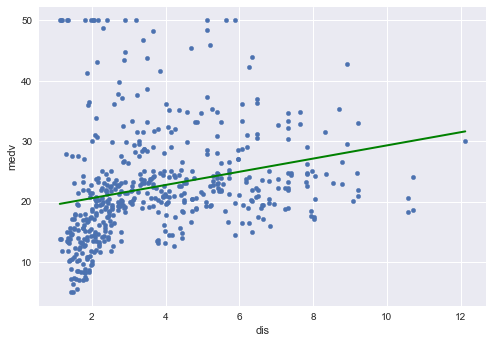

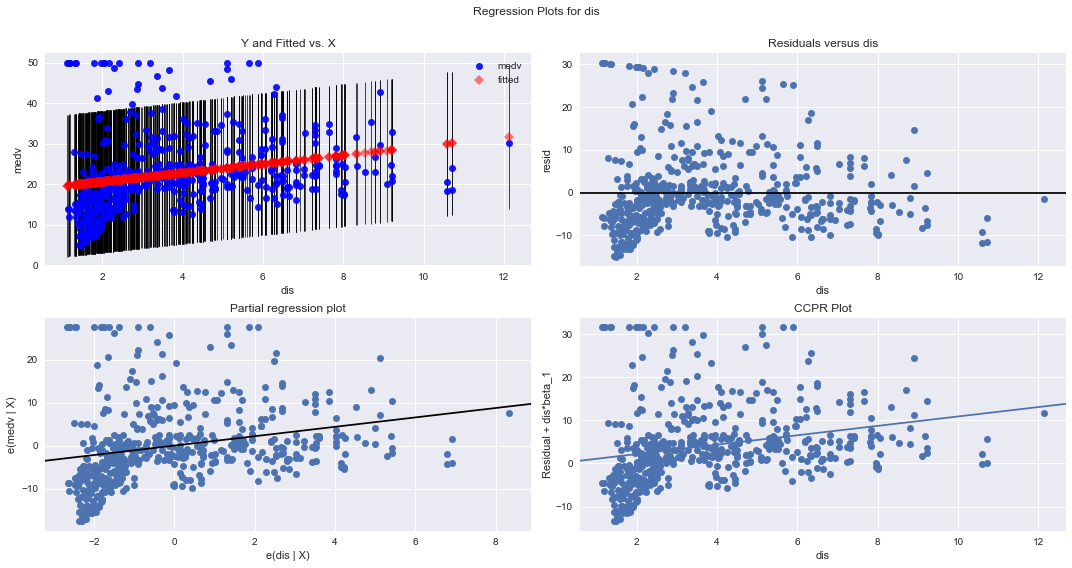

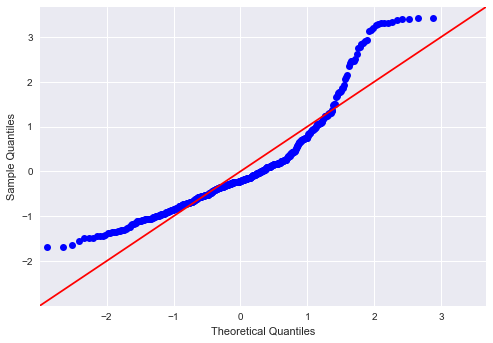

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~rm
--------------------------------------------------------------------------------------


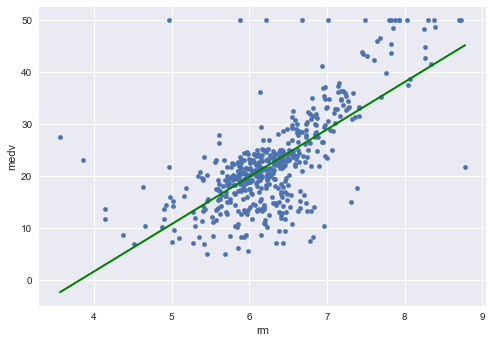

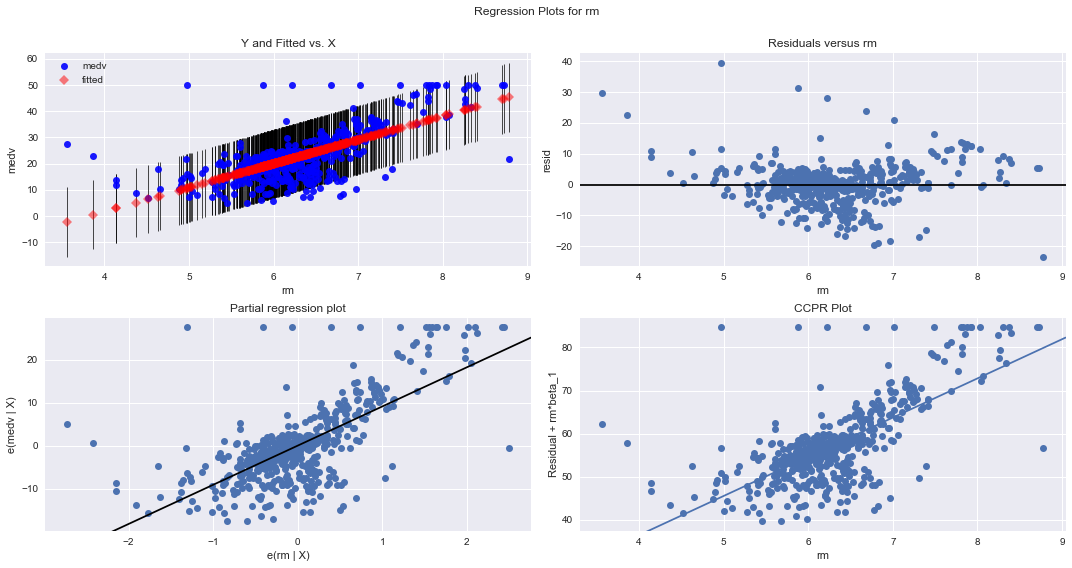

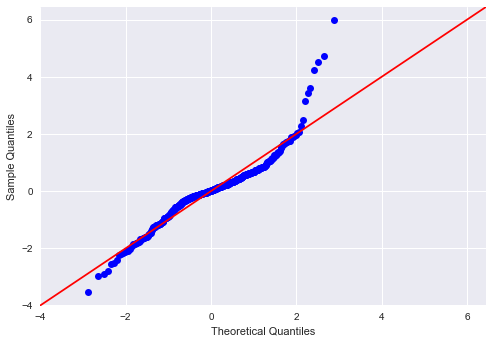

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~zn
--------------------------------------------------------------------------------------


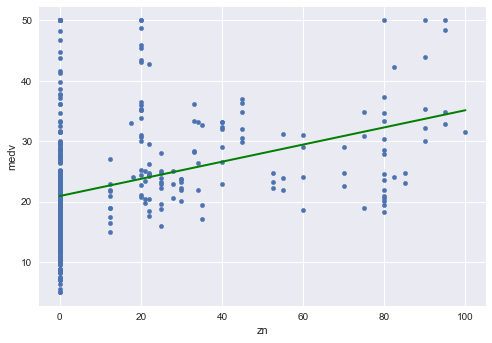

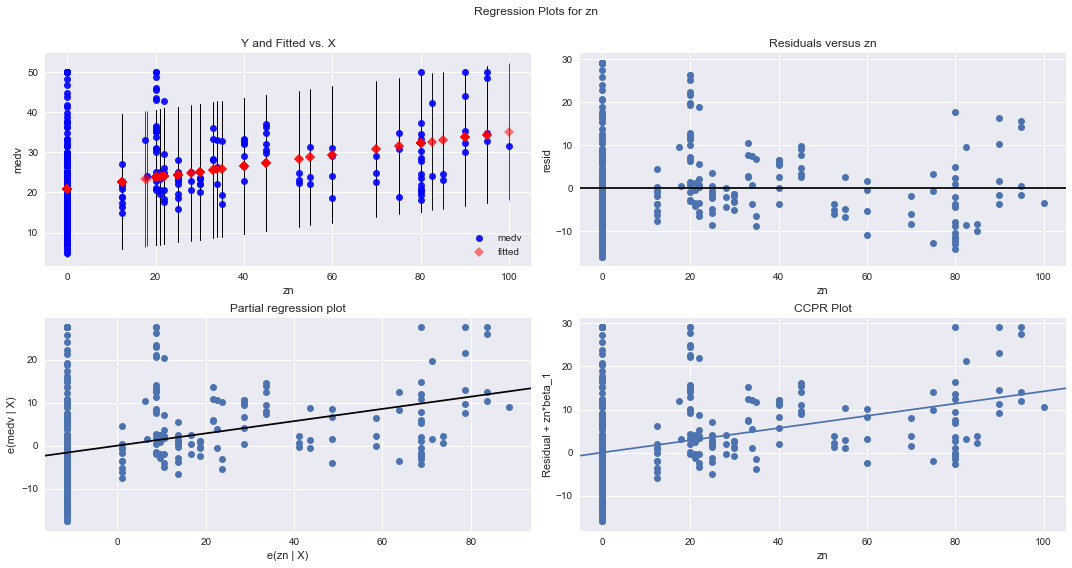

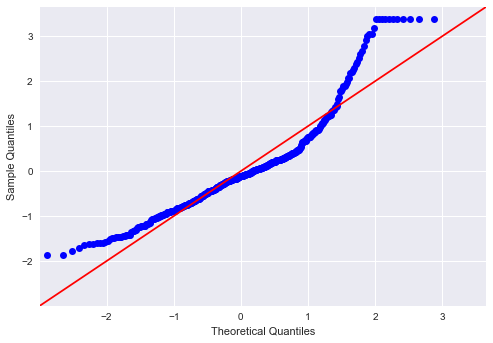

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~age
--------------------------------------------------------------------------------------


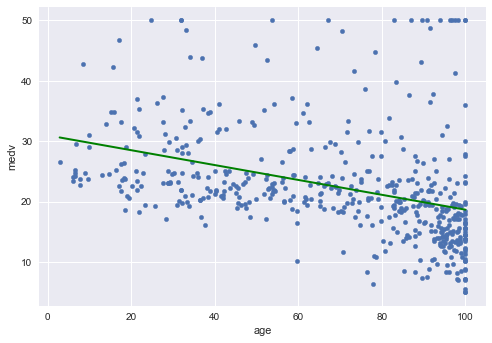

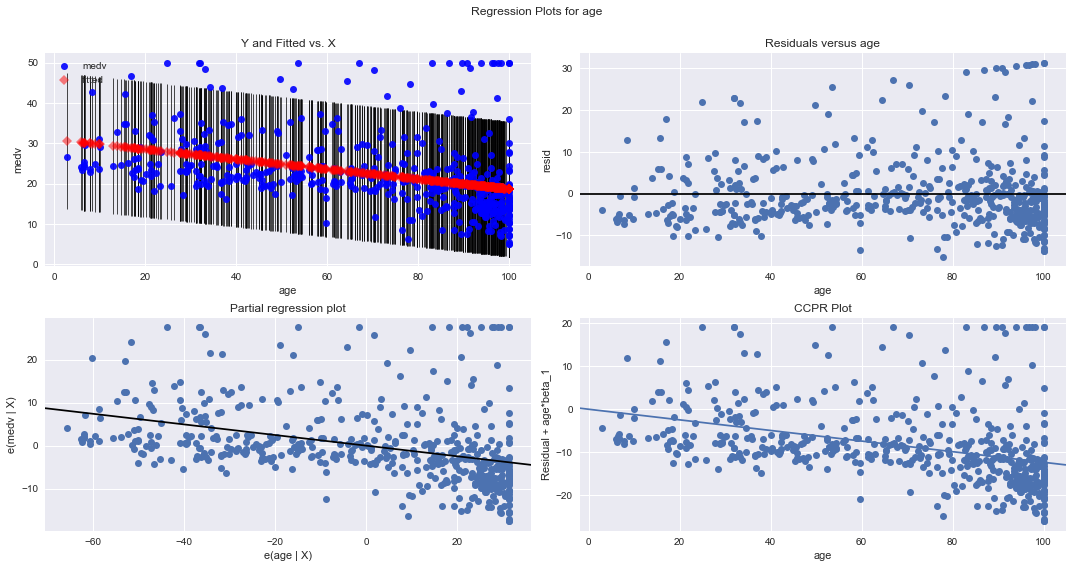

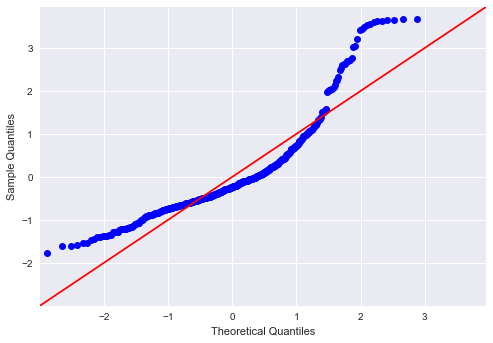

Press Enter to continue...


In [19]:
# Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols
plt.style.use('seaborn')
# build the formula 
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality(JB)']]
for idx, val in enumerate(['crim', 'dis', 'rm', 'zn', 'age']):
    print("Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~" + val)
    print('--------------------------------------------------------------------------------------')
    f = 'medv~' + val
    model = ols(formula=f, data=df).fit()
    
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    df.plot(kind='scatter', x=val, y='medv')
    plt.plot(X_new, preds, c='green', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    input("Press Enter to continue...")

In [118]:
#Your observations here 
#Crime has a negative relationships with medv, as in lower crime = higher price
#Crime does not show signs of heteroscedasticity
#Crime has a very low r-squared so it is not a good fit
#Residuals are also not normally distributed

#Dis and medv have a positive relationship
#Dis residual plots have some signs of heteroscedasicity as the residuals are cone-shaped
#normality however is still questionable

#rm shows a strong positive relationship with medv
#rm residuals have no signs of heteroscedasicity, some outliers are present
#rm qqplot shows a long right tail so that is not normally distributed

#zn has a lot of variance which has a low r-squared value
#zn has no signs of heteroscedasticity in the residual plot
#normality through qq plots and jb are definitely not perfect

#age has a negative relationship with medv
#heterodasticity and normality are questionable based on the residual plots

Clearly, the results are not very reliable. The best R-Squared is witnessed with `rm`, so in this analysis, this is our best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where the preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in the results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.